In [1]:
#function to read the lines of a document
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def Read(file):
    with open(file,'r') as f:
        return f.readlines()
    
def preprocess_text_with_line_numbers(filename):
   
    input_lines = Read(filename)
    abstract_lines = ""  # create an empty abstract
    abstract_samples = []  # create an empty list of abstracts
    
    # Loop through each line in target file
    for line in input_lines:
        if line.startswith('###'):
            abstract_id = line
            abstract_lines = "" # reset abstract string
        elif line.isspace():
            abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines
            
            # Iterate through each line in abstract and count them at the same time
            for abstract_line_number,abstract_line in enumerate(abstract_line_split):
                line_data = {} # create empty dict to store data from line
                target_text_split = abstract_line.split('\t') # split target label from text
                line_data['target'] = target_text_split[0] # get target label
                line_data["text"] = target_text_split[1].lower() # get target text and lower it
                line_data['line_number'] = abstract_line_number # what number line does the line appear in the abstract?
                line_data['total_lines'] = len(abstract_line_split) - 1 # how many total lines are in the abstract? (start from 0)
                abstract_samples.append(line_data)
        
        else:abstract_lines += line
            
    return abstract_samples              


def calculate_results(y_true,y_pred):
    # Calculate model accuracy
    model_accuracy=accuracy_score(y_true,y_pred)*100
    # Calculate model precision, recall and f1 score using "weighted" average
    model_precision,model_recall,model_f1,_ = precision_recall_fscore_support(y_true,y_pred,average="weighted")
    model_results = {"accuracy": model_accuracy,
                    "precision": model_precision,
                    "recall": model_recall,
                    "f1-score": model_f1}
    
    return model_results


In [2]:
import pandas as pd

In [3]:
# Get data from file and preprocess it
train_df = pd.DataFrame(preprocess_text_with_line_numbers("20k_abstracts_numbers_with_@/train.txt"))
val_df = pd.DataFrame(preprocess_text_with_line_numbers("20k_abstracts_numbers_with_@/dev.txt"))
test_df = pd.DataFrame(preprocess_text_with_line_numbers("20k_abstracts_numbers_with_@/test.txt"))

In [4]:
# Convert abstract text lines into lists 
train_sentences = train_df["text"].to_list()
val_sentences = val_df["text"].to_list()
test_sentences = test_df["text"].to_list()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [5]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [6]:
train_df

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
...,...,...,...,...
180035,RESULTS,for the absolute change in percent atheroma vo...,7,11
180036,RESULTS,"for pav , a significantly greater percentage o...",8,11
180037,RESULTS,both strategies had acceptable side effect pro...,9,11
180038,CONCLUSIONS,"compared with standard statin monotherapy , th...",10,11


METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64


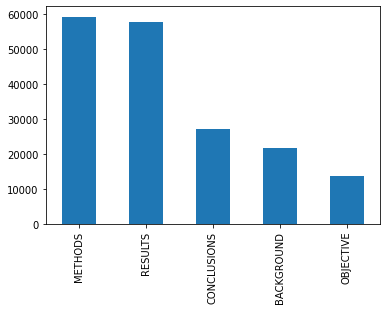

In [7]:
print(train_df.target.value_counts())
train_df.target.value_counts().plot.bar();

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

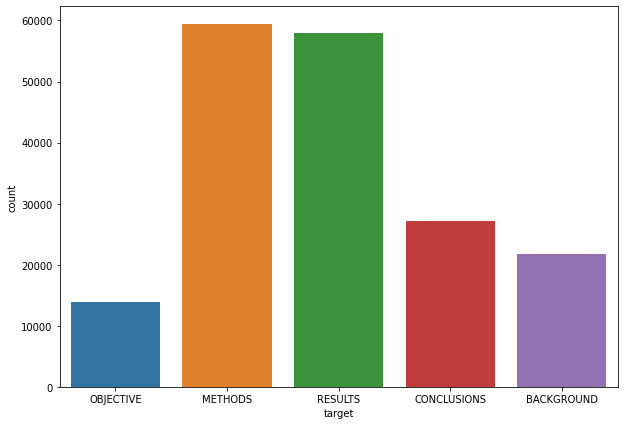

In [9]:
train_df['target'].value_counts()
plt.figure(figsize=(10,7))
sns.countplot('target',data=train_df)

# Make numeric labels (ML models require numeric labels)                                            

In [10]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.transform(val_df['target'].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.transform(test_df['target'].to_numpy().reshape(-1,1))

train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [11]:
# Extract labels ("target" columns) and encode them into integers 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df['target'].to_numpy())
val_labels_encoded = label_encoder.fit_transform(val_df['target'].to_numpy())
test_labels_encoded = label_encoder.fit_transform(test_df['target'].to_numpy())

# Check what training labels look like
train_labels_encoded , val_labels_encoded , test_labels_encoded

(array([3, 2, 2, ..., 4, 1, 1]),
 array([0, 0, 3, ..., 4, 1, 1]),
 array([0, 4, 4, ..., 4, 4, 1]))

In [12]:
class_names = label_encoder.classes_
num_classes = len(label_encoder.classes_)
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create a pipeline
model_0 = Pipeline([
    ("tf-idf",TfidfVectorizer()),
    ("clf",MultinomialNB())
])

# Fit the pipeline to the training data
model_0.fit(X=train_sentences,y=train_labels_encoded);

In [14]:
# Evaluate baseline on validation dataset
model_0.score(X=val_sentences,y=val_labels_encoded)

0.7218323844829869

In [15]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [16]:
# Calculate baseline results
baseline_results = calculate_results(y_true=val_labels_encoded,y_pred=baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1-score': 0.6989250353450294}

In [17]:
import pickle
pickle.dump(model_0, open('model_0_tfidf_MNB', 'wb'))

In [18]:
s = '''WLAN, Access Point (AP) and its asso-
ciated mobile stations (MSs) forms a basic service set (BSS). In

such network a continuous service coverage with an acceptable
throughput while the MSs roam around the network is highly
desirable. Limited size of WLAN BSSs with increased deployment
results more transmission overlapping and frequent hand-offs.
This significantly increases the delay. On the other hand, selection
of appropriate target AP is another major issue as it crucially
determines the obtained throughput. In this paper we propose a
load aware channel probing (LACP) towards an efficient hand-off

addressing these two issues simultaneously. Based on the accumu-
lated load on the APs in range the proposed approach efficiently

reduces the probe-count during hand-off by avoiding unnecessary
channel probing and selects the appropriate destination AP.
The objective is to reduce the hand-off delay and enhanced
obtained throughput. We first present a motivational example
then develop an elegant algorithm. The novelty of the idea is
established through extensive simulations. We have shown that
the performance of the proposed approach is highly comparable
to the other approaches from existing literature.''' 
l= [' '.join(i.split()) for i in s.split('.')][:-1]

In [19]:
model_0.predict(l)

array([2, 0, 4, 4, 0, 1, 1, 2, 2, 1, 0])

In [20]:
d = {0:'BACKGROUND', 1:'CONCLUSIONS', 2:'METHODS', 3:'OBJECTIVE', 4:'RESULTS'}
i = model_0.predict(l).tolist()
res=[]
for m,n in zip(i,l):
    lst = []
    target,val = d[m],n
    lst.append(target)
    lst.append(val)
    res.append(lst)
df = pd.DataFrame(res, columns=['Target', 'Value'])
    

In [21]:
df

,Target,Value
0,METHODS,"WLAN, Access Point (AP) and its asso- ciated m..."
1,BACKGROUND,In such network a continuous service coverage ...
2,RESULTS,Limited size of WLAN BSSs with increased deplo...
3,RESULTS,This significantly increases the delay
4,BACKGROUND,"On the other hand, selection of appropriate ta..."
5,CONCLUSIONS,In this paper we propose a load aware channel ...
6,CONCLUSIONS,Based on the accumu- lated load on the APs in ...
7,METHODS,The objective is to reduce the hand-off delay ...
8,METHODS,We first present a motivational example then d...
9,CONCLUSIONS,The novelty of the idea is established through...


In [22]:
df = df['Value'].groupby([df.Target]).apply(list).reset_index()
df

,Target,Value
0,BACKGROUND,[In such network a continuous service coverage...
1,CONCLUSIONS,[In this paper we propose a load aware channel...
2,METHODS,"[WLAN, Access Point (AP) and its asso- ciated ..."
3,RESULTS,[Limited size of WLAN BSSs with increased depl...


In [23]:
df['Value'].values

array([list(['In such network a continuous service coverage with an acceptable throughput while the MSs roam around the network is highly desirable', 'On the other hand, selection of appropriate target AP is another major issue as it crucially determines the obtained throughput', 'We have shown that the performance of the proposed approach is highly comparable to the other approaches from existing literature']),
       list(['In this paper we propose a load aware channel probing (LACP) towards an efficient hand-off addressing these two issues simultaneously', 'Based on the accumu- lated load on the APs in range the proposed approach efficiently reduces the probe-count during hand-off by avoiding unnecessary channel probing and selects the appropriate destination AP', 'The novelty of the idea is established through extensive simulations']),
       list(['WLAN, Access Point (AP) and its asso- ciated mobile stations (MSs) forms a basic service set (BSS)', 'The objective is to reduce the h

# Model 1 Convo1D

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [25]:
# How long is each sentence on average?
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_lens = np.mean(sent_lens)
avg_sent_lens
# har sentence me average 26 words hai

26.338269273494777

(array([1.5999e+05, 1.8760e+04, 1.1510e+03, 9.9000e+01, 2.8000e+01,
        1.0000e+01, 2.0000e+00]),
 array([  1.        ,  43.14285714,  85.28571429, 127.42857143,
        169.57142857, 211.71428571, 253.85714286, 296.        ]),
 <BarContainer object of 7 artists>)

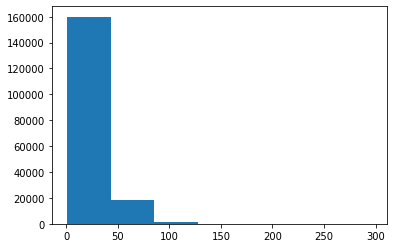

In [26]:
import matplotlib.pyplot as plt
plt.hist(sent_lens,bins=7)

In [27]:
output_seq_len = int(np.percentile(sent_lens,95))
output_seq_len

55

In [28]:
# 68k vocabulary size hai
max_tokens = 68000
max_token_length = 55

In [29]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_tokens, # number of words in vocabulary
                                output_sequence_length=max_token_length)  # desired output length of vectorized sequences

In [30]:
text_vectorizer.adapt(train_sentences)

In [31]:
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n {target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text:\n {text_vectorizer([target_sentence])}")

Text:
 there were no differences between the groups in terms of clinical data , except tumour stage , which was more advanced in the high-ligation group ( p = @ ) .

Length of text: 31

Vectorized text:
 [[   61     9    33   102    30     2    24     5   614     4    47   100
   1081  1749   531   126    10    69   588     5     2 38325    13    14
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [32]:
#text_vectorizer('Brother Car Bike Cars Sister Mother Boy Girl')

In [33]:
a = text_vectorizer.get_vocabulary()
len(a),a[:5],a[-5:]

(64841,
 ['', '[UNK]', 'the', 'and', 'of'],
 ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp'])

In [34]:
token_embed = layers.Embedding(input_dim=len(a),# length of vocabulary
                              output_dim=256,
                              mask_zero=True, # Use masking to handle variable sequence lengths (save space)
                              name="token_embedding")

# Show example embedding
print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
there were no differences between the groups in terms of clinical data , except tumour stage , which was more advanced in the high-ligation group ( p = @ ) .

Sentence after vectorization (before embedding):
[[   61     9    33   102    30     2    24     5   614     4    47   100
   1081  1749   531   126    10    69   588     5     2 38325    13    14
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]

Sentence after embedding:
[[[ 0.02601102 -0.04906195  0.02056846 ...  0.02442059  0.03326763
    0.03258094]
  [ 0.03009829  0.02883946 -0.02359685 ...  0.01718214  0.04443095
    0.00802362]
  [-0.02141457  0.03966577 -0.00920556 ... -0.04815021  0.01061258
    0.02475375]
  ...
  [ 0.01746089  0.03267049 -0.01112397 ... -0.03250869  0.04383978
   -0.03421547]
  [ 0.01746089  0.03267049 -0.01112397 ... -0.03250869

In [35]:
# Turn our data into TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences,val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_one_hot))

train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [36]:
# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [37]:
# Create 1D convolutional model to process sequences
inputs = layers.Input(shape=(1,),dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding
x = layers.Conv1D(64,kernel_size=5,padding="same",activation="relu")(token_embeddings)
x=layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(num_classes,activation="softmax")(x)
model_1 = tf.keras.Model(inputs,outputs)

model_1.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [38]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 55, 256)          16599296  
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            81984     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

In [39]:
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch = int(0.2*len(train_dataset)),
                              epochs=5,
                              validation_data=valid_dataset,
                              validation_steps=int(0.2*len(valid_dataset)))

Epoch 1/5
1125/1125 [==============================] - 318s 282ms/step - loss: 0.7508 - accuracy: 0.7128 - val_loss: 0.6100 - val_accuracy: 0.7794
Epoch 2/5
1125/1125 [==============================] - 339s 301ms/step - loss: 0.5876 - accuracy: 0.7889 - val_loss: 0.5582 - val_accuracy: 0.8024
Epoch 3/5
1125/1125 [==============================] - 326s 290ms/step - loss: 0.5756 - accuracy: 0.7946 - val_loss: 0.5344 - val_accuracy: 0.8135
Epoch 4/5
1125/1125 [==============================] - 321s 285ms/step - loss: 0.5409 - accuracy: 0.8078 - val_loss: 0.5183 - val_accuracy: 0.8161
Epoch 5/5
1125/1125 [==============================] - 323s 287ms/step - loss: 0.5350 - accuracy: 0.8104 - val_loss: 0.5236 - val_accuracy: 0.8123


In [40]:
model_1.evaluate(valid_dataset)

945/945 [==============================] - 8s 8ms/step - loss: 0.5267 - accuracy: 0.8116


[0.5266614556312561, 0.8116311430931091]

In [41]:
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs

945/945 [==============================] - 8s 8ms/step


array([[5.57684124e-01, 1.04631945e-01, 1.22684218e-01, 1.58765420e-01,
        5.62342927e-02],
       [5.07422149e-01, 2.35563844e-01, 7.80455815e-03, 2.21511737e-01,
        2.76976898e-02],
       [2.21910790e-01, 5.79888979e-03, 1.14151090e-03, 7.71083355e-01,
        6.54372416e-05],
       ...,
       [3.15878424e-06, 1.17544027e-04, 1.66459335e-03, 5.19157538e-06,
        9.98209476e-01],
       [1.07474878e-01, 4.07939732e-01, 1.58317879e-01, 7.35454261e-02,
        2.52722144e-01],
       [2.87872925e-02, 9.41649020e-01, 2.42682900e-02, 7.53978558e-04,
        4.54130257e-03]], dtype=float32)

In [42]:
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1], dtype=int64)>

In [43]:
model_1_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 81.1631139944393,
 'precision': 0.8087281713167872,
 'recall': 0.811631139944393,
 'f1-score': 0.8078007085694875}

In [58]:
pred = model_1.predict(l)

1/1 [==============================] - 0s 44ms/step


In [60]:
tf.argmax(pred, axis=1)

<tf.Tensor: shape=(11,), dtype=int64, numpy=array([2, 0, 1, 1, 2, 0, 1, 0, 2, 4, 0], dtype=int64)>

In [61]:
pickle.dump(model_0, open('model_1_Conv1D_TokenEmbedding', 'wb'))